In [1]:
import os
import numpy as np
from tensorflow.keras.applications import ResNet50
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [2]:
train_dir = r'D:\Download\zyFile\Machine_Vision\MV_Seminar_Week 2\Machine_Vision_homework\MV_Seminar Week 5\data_mv\train'
test_dir = r'D:\Download\zyFile\Machine_Vision\MV_Seminar_Week 2\Machine_Vision_homework\MV_Seminar Week 5\data_mv\test'
# Load and preprocess the training data
train_datagen = ImageDataGenerator(rescale=1.0 / 255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=4,
    class_mode='categorical',  # Assuming labels are provided as integers
    color_mode='rgb'  # Assuming images are grayscale
)
# Load and preprocess the test data
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=4,
    class_mode='categorical',
    color_mode='rgb'
)
x_train, y_train = train_generator.next()
x_test, y_test = test_generator.next()

Found 48 images belonging to 3 classes.
Found 24 images belonging to 3 classes.


In [3]:
# Load pre-trained ResNet50 model (excluding top layers)
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(128, 128, 3))

94781440/94765736 [==============================] - 104s 1us/step


In [4]:
# Add custom top layers for classification
x = Flatten()(base_model.output)
x = Dense(64, activation='relu')(x)
output = Dense(3, activation='softmax')(x)

In [5]:
# Create the new model
model = Model(inputs=base_model.input, outputs=output)

In [6]:
# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

In [7]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1_conv[0][0]']         

In [8]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
1/1 [==============================] - 5s 5s/step - loss: 1.6313 - accuracy: 0.3333 - val_loss: 4.4703 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 56ms/step - loss: 1.0094 - accuracy: 0.6667 - val_loss: 6.7249 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 53ms/step - loss: 0.9397 - accuracy: 0.6667 - val_loss: 8.4623 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 60ms/step - loss: 0.6235 - accuracy: 0.6667 - val_loss: 10.1141 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 51ms/step - loss: 0.4988 - accuracy: 1.0000 - val_loss: 11.5841 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 39ms/step - loss: 0.6002 - accuracy: 0.6667 - val_loss: 12.4487 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 49ms/step - loss: 0.5781 - accuracy: 0.6667 - val_loss: 12.8281 - val_accuracy: 0.0000e+

In [10]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

1/1 [==============================] - 0s 276ms/step - loss: 4.3037 - accuracy: 0.2500
Test accuracy: 0.25


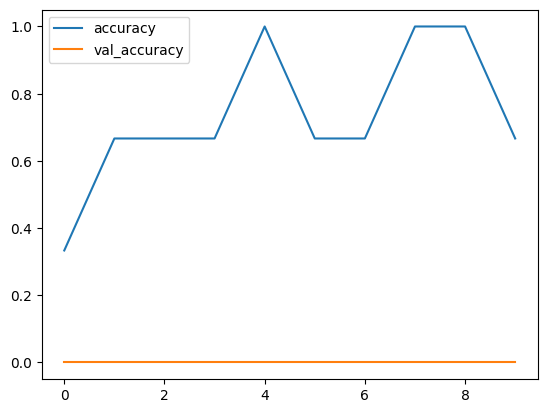

In [11]:
# Plotting the training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

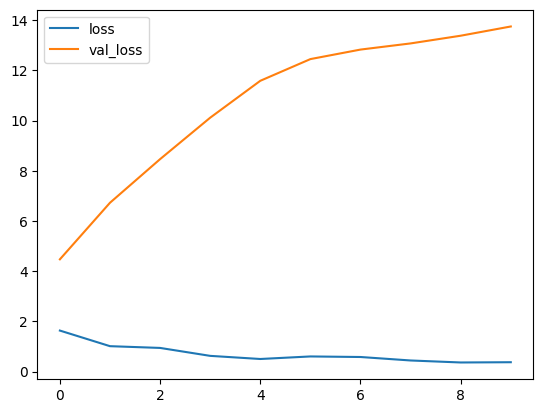

In [12]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()